<a href="https://colab.research.google.com/github/Fazril1/Machine-Learning/blob/main/Tugas-Tugas/Tugas%20Minggu%206/K-Means%20Clustering%20menggunakan%20google%20colab%20dengan%20Mall_Customers/K%20Means%20Clustering%20using%20Mall%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ibnu Fazril 1103201241 Tugas ke-6 K-Means Clustering using Mall Customers Dataset

In [13]:
from google.colab import drive # Panggil modul drive dari daftar pustaka google collab untuk mengakses google drive
drive.mount('/content/drive') # Lokasi Direktori yang akan diakses

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd # Panggil modul pandas untuk membaca dataframe dan menganalisis data

file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv' # Lokasi file dataset di Google Drive

df = pd.read_csv(file_path) # Membaca dataset CSV ke dalam DataFrame dan merubah format data dengan encoding agar data bisa diuraikan

print(df.head()) # Menampilkan beberapa baris pertama dataset

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [15]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True) # Ubah nama parameter menjadi lebih sederhana

print(df.head()) # Menampilkan beberapa baris pertama dataset

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [16]:
df = df.drop(["CustomerID", 'Gender'], axis = 1) # Hapus paramater CustomerID dan Gender karena tidak berpengaruh terhadap sebaran data pada klustering

print(df.head()) # Menampilkan beberapa baris pertama dataset

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

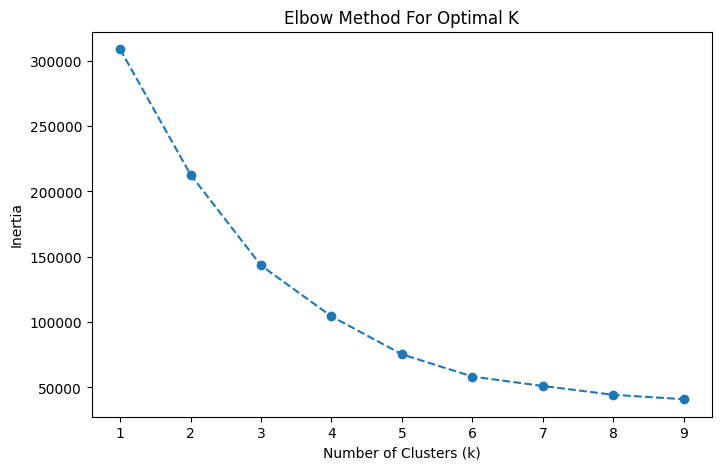

In [17]:
import matplotlib.pyplot as plt # Panggil modul matplotlib.pyplot untuk memvisualisasikan sebaran data ke dalam grafik
from sklearn.cluster import KMeans # Panggil modul KMeans dari daftar pustaka sklearn.cluster untuk menggunakan K-Means Clustering

X = df[['Age', 'Annual Income', 'Spending Score']] # Memilih atribut yang akan digunakan dalam analisis kluster

max_k = 10 # Set nilai max_k ke 10

inertia = [] # Menginisialisasi list untuk menyimpan inersia (inertia) untuk setiap nilai k

for k in range(1, max_k): # Melakukan analisis elbow untuk nilai k dari 1 hingga max_k
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan k kluster
    kmeans.fit(X) # Lakukan prediksi K-Means berdasarkan variabel x dan labels g
    inertia.append(kmeans.inertia_) # Menyimpan nilai inertia ke dalam list

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(1, max_k), inertia, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 1 sampai max_k
plt.title('Elbow Method For Optimal K') # Menulis judul dengan nama Elbow Method For Optimal K
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Inertia') # Menulis label 'y' (yang di kiri) dengan nama Inertia
plt.xticks(range(1, max_k)) # Jangkauan nilai plot hanya dari 1 sampai max_k
plt.show() # Tampilkan figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


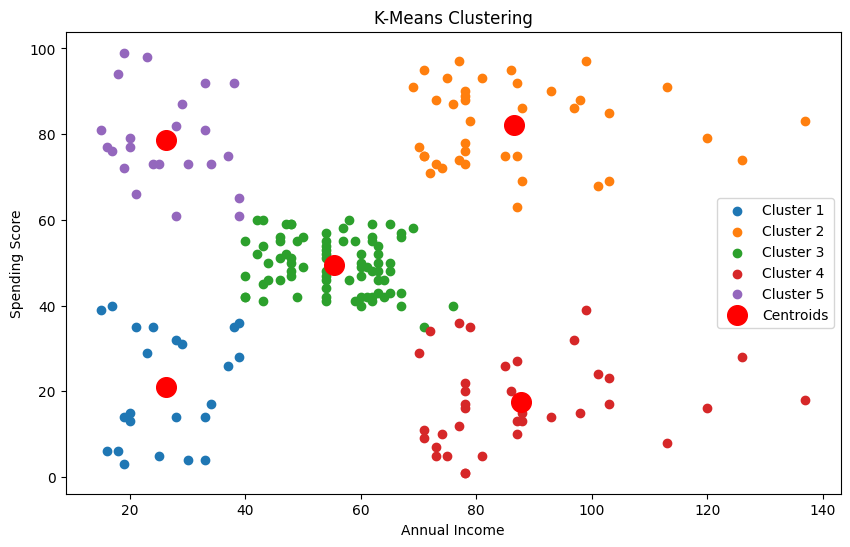

In [18]:
kmeans = KMeans(n_clusters=5, random_state=0) # Membuat model K-Means dengan 5 kluster

df['label'] = kmeans.fit_predict(X) # Melakukan klustering dan menambahkan kolom 'label' ke DataFrame

# Memvisualisasikan hasil klustering
plt.figure(figsize=(10, 6)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 6 inci

# Menggunakan scatter plot untuk visualisasi
plt.scatter(df[df['label'] == 0]['Annual Income'], df[df['label'] == 0]['Spending Score'], label='Cluster 1') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 1]['Annual Income'], df[df['label'] == 1]['Spending Score'], label='Cluster 2') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 2]['Annual Income'], df[df['label'] == 2]['Spending Score'], label='Cluster 3') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 3]['Annual Income'], df[df['label'] == 3]['Spending Score'], label='Cluster 4') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 4]['Annual Income'], df[df['label'] == 4]['Spending Score'], label='Cluster 5') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids') # Membuat centroid
plt.title('K-Means Clustering') # Menulis judul dengan nama K-Means Clustering
plt.xlabel('Annual Income') # Menulis label 'x' (yang di bawah) dengan nama Annual Income
plt.ylabel('Spending Score') # Menulis label 'y' (yang di kiri) dengan nama Spending Score
plt.legend() # Tampilkan guide tentang plot
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


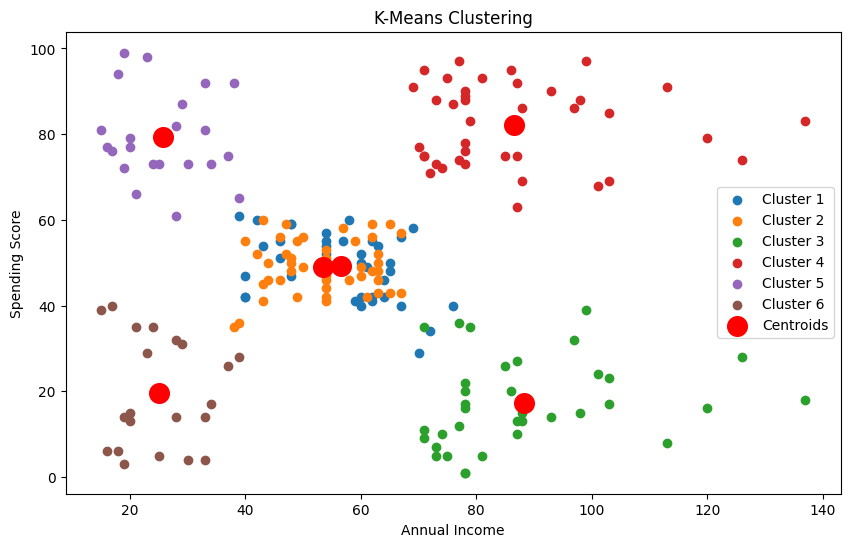

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0) # Membuat model K-Means dengan 6 kluster

df['label'] = kmeans.fit_predict(X) # Melakukan klustering dan menambahkan kolom 'label' ke DataFrame

plt.figure(figsize=(10, 6)) # Memplotkan figure dengan ukuran lebar 10 inci dan tinggi 6 inci

# Menggunakan scatter plot untuk visualisasi
plt.scatter(df[df['label'] == 0]['Annual Income'], df[df['label'] == 0]['Spending Score'], label='Cluster 1') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 1]['Annual Income'], df[df['label'] == 1]['Spending Score'], label='Cluster 2') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 2]['Annual Income'], df[df['label'] == 2]['Spending Score'], label='Cluster 3') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 3]['Annual Income'], df[df['label'] == 3]['Spending Score'], label='Cluster 4') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 4]['Annual Income'], df[df['label'] == 4]['Spending Score'], label='Cluster 5') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score
plt.scatter(df[df['label'] == 5]['Annual Income'], df[df['label'] == 5]['Spending Score'], label='Cluster 6') # Pengelompokkan cluster berdasarkan nilai Annual Income dan Spending Score

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')  # Membuat centroid
plt.title('K-Means Clustering') # Menulis judul dengan nama K-Means Clustering
plt.xlabel('Annual Income') # Menulis label 'x' (yang di bawah) dengan nama Annual Income
plt.ylabel('Spending Score') # Menulis label 'y' (yang di kiri) dengan nama Spending Score
plt.legend() # Tampilkan guide tentang plot
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.29
Silhouette Score for k=3: 0.38
Silhouette Score for k=4: 0.41
Silhouette Score for k=5: 0.44
Silhouette Score for k=6: 0.45
Silhouette Score for k=7: 0.44
Silhouette Score for k=8: 0.43
Silhouette Score for k=9: 0.40
Silhouette Score for k=10: 0.38


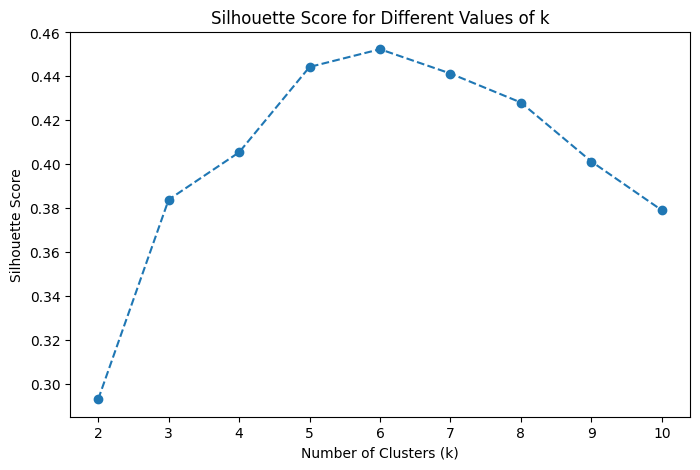

In [20]:
from sklearn.metrics import silhouette_score # Panggil modul silhouette_score dari daftar pustaka sklearn.metrics untuk melihat kualitas pengelompokkan klustering
import numpy as np # Panggil modul numpy untuk penjumlahan aritmatika

silhouette_scores = [] # Membuat list untuk menyimpan nilai Silhouette Score

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    silhouette_avg = silhouette_score(X, labels) # Simpan Silhoutte Score berdasarkan variabel x dan labels ke variabel silhouette_avg
    silhouette_scores.append(silhouette_avg) # Menyimpan nilai Silhouette Score ke dalam list

for k, score in zip(range(2, 11), silhouette_scores): # Melakukan perulangan nilai Silhouette Score untuk masing-masing k
    print(f'Silhouette Score for k={k}: {score:.2f}') # Menampilkan nilai Silhoutte Score

# Memvisualisasikan Silhouette Score
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Silhouette Score for Different Values of k') # Menulis judul dengan nama Silhouette Score for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Silhouette Score') # Menulis label 'y' (yang di kiri) dengan nama Silhouette Score
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.36
Davies-Bouldin Index for k=3: 0.87
Davies-Bouldin Index for k=4: 0.89
Davies-Bouldin Index for k=5: 0.82
Davies-Bouldin Index for k=6: 0.75
Davies-Bouldin Index for k=7: 0.79
Davies-Bouldin Index for k=8: 0.86
Davies-Bouldin Index for k=9: 0.91
Davies-Bouldin Index for k=10: 0.96


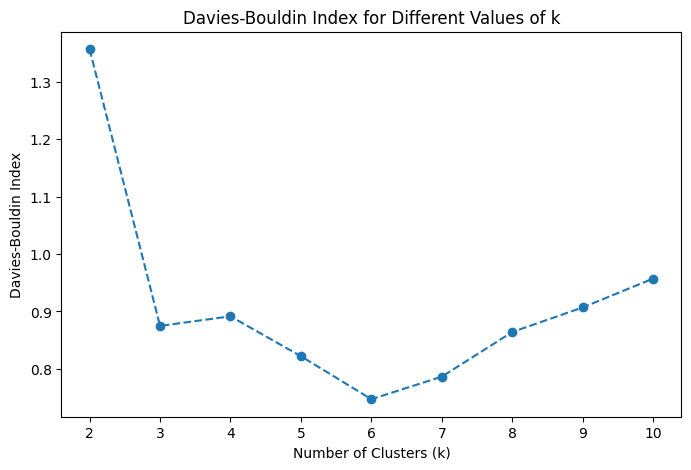

In [21]:
from sklearn.metrics import davies_bouldin_score # Panggil modul davies_bouldin_score dari daftar pustaka sklearn.metrics untuk menggunakan matriks evaluasi davies_bouldin_score

dbi_scores = [] # Membuat list untuk menyimpan nilai Davies-Bouldin Index

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    dbi = davies_bouldin_score(X, labels) # Simpan davies bouldin score berdasarkan variabel x dan labels ke variabel dbi
    dbi_scores.append(dbi) # Menyimpan nilai dbi scores ke dalam list

for k, score in zip(range(2, 11), dbi_scores): # Melakukan perulangan nilai Davies-Bouldin Index untuk masing-masing k
    print(f'Davies-Bouldin Index for k={k}: {score:.2f}') # Menampilkan nilai Davies-Bouldin Index

# Memvisualisasikan Davies-Bouldin Index
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), dbi_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Davies-Bouldin Index for Different Values of k') # Menulis judul dengan nama Davies-Bouldin Index for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Davies-Bouldin Index') # Menulis label 'y' (yang di kiri) dengan nama Davies-Bouldin Index
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28
Calinski-Harabasz Index for k=3: 113.71
Calinski-Harabasz Index for k=4: 127.98
Calinski-Harabasz Index for k=5: 151.04
Calinski-Harabasz Index for k=6: 166.72
Calinski-Harabasz Index for k=7: 162.29
Calinski-Harabasz Index for k=8: 163.58
Calinski-Harabasz Index for k=9: 156.16
Calinski-Harabasz Index for k=10: 152.26


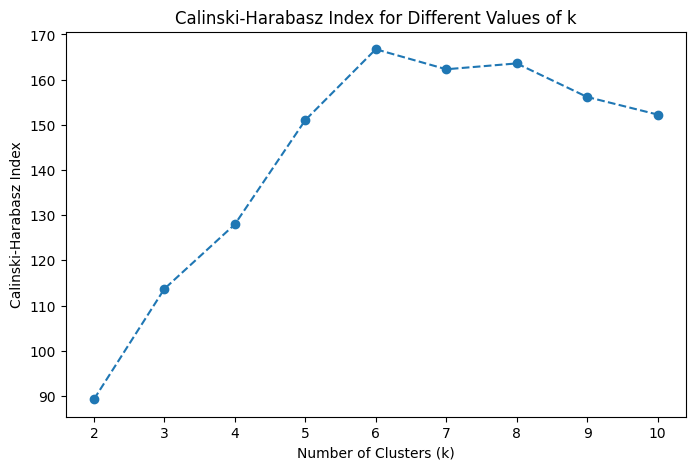

In [22]:
from sklearn.metrics import calinski_harabasz_score # Panggil modul calinski_harabasz_score dari daftar pustaka sklearn.metrics untuk menggunakan matriks evaluasi calinski_harabasz_score

chi_scores = [] # Membuat list untuk menyimpan nilai Calinski-Harabasz Index

for k in range(2, 11): # Melakukan analisis kluster untuk nilai k dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0) # Membuat model K-Means dengan K kluster
    labels = kmeans.fit_predict(X) # Simpan prediksi K-Means ke variabel labels
    chi = calinski_harabasz_score(X, labels) # Simpan calinski harabasz score berdasarkan variabel x dan labels ke variabel chi
    chi_scores.append(chi) # Menyimpan nilai chi scores ke dalam list

for k, score in zip(range(2, 11), chi_scores): # Melakukan perulangan nilai Calinski-Harabasz Index untuk masing-masing k
    print(f'Calinski-Harabasz Index for k={k}: {score:.2f}') # Menampilkan nilai Calinski-Harabasz Index

# Memvisualisasikan Calinski-Harabasz Index
plt.figure(figsize=(8, 5)) # Memplotkan figure dengan ukuran lebar 8 inci dan tinggi 5 inci
plt.plot(range(2, 11), chi_scores, marker='o', linestyle='--') # Buat line berupa garis 'putus-putus' dengan simbol 'o' dengan jangkauan 2 sampai 10
plt.title('Calinski-Harabasz Index for Different Values of k') # Menulis judul dengan nama Calinski-Harabasz Index for Different Values of k
plt.xlabel('Number of Clusters (k)') # Menulis label 'x' (yang di bawah) dengan nama Number of Clusters (k)
plt.ylabel('Calinski-Harabasz Index') # Menulis label 'y' (yang di kiri) dengan nama Calinski-Harabasz Index
plt.xticks(range(2, 11)) # Jangkauan nilai plot hanya dari 2 sampai 10
plt.show() # Tampilkan figure
